### Steps

* 0. Preprocess + EDA + Feature Selection
* 1. Extract input and output cols
* 2. Scale the values
* 3. Train test split
* 4. Train the model
* 5. Evaluate the model/model selection
* 6. Deploy the model make .pkl file

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


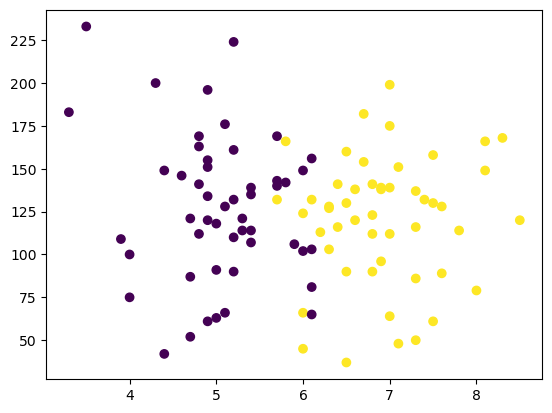

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
85,5.8,166.0
63,6.3,128.0
74,6.7,154.0
27,6.0,124.0
97,6.7,182.0
...,...,...
70,6.3,127.0
61,7.3,137.0
31,3.9,109.0
75,4.8,169.0


In [15]:
y_train

85    1
63    1
74    1
27    1
97    1
     ..
70    1
61    1
31    0
75    0
18    0
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
81,5.4,107.0
77,7.3,50.0
39,4.6,146.0
45,6.0,66.0
50,3.5,233.0
96,4.4,42.0
3,7.4,132.0
9,5.1,66.0
99,6.2,113.0
94,4.7,52.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[-0.22416041,  1.08928911],
       [ 0.22416041,  0.0512928 ],
       [ 0.58281707,  0.7615008 ],
       [-0.04483208, -0.05796997],
       [ 0.58281707,  1.52634019],
       [ 0.31382457, -0.27649551],
       [-0.67248123, -0.33112689],
       [-0.04483208, -2.21590967],
       [-0.94147372, -0.22186412],
       [ 0.7621454 , -0.82280936],
       [ 1.56912287, -0.33112689],
       [-1.56912287,  2.01802265],
       [-1.83811537, -1.39643889],
       [ 2.01744369,  1.14392049],
       [-1.03113789, -1.77885859],
       [ 0.31382457,  0.4063968 ],
       [ 0.04483208,  0.16055557],
       [-0.31382457,  0.46102819],
       [-0.04483208,  0.62492234],
       [-0.58281707,  0.24250265],
       [ 1.12080205, -1.09596628],
       [ 2.19677202, -0.16723274],
       [ 0.7621454 ,  0.32444972],
       [-1.03113789,  0.67955372],
       [ 0.94147372, -2.13396259],
       [-0.58281707, -0.33112689],
       [ 0.85180956,  1.33513034],
       [ 1.30013038,  0.10592418],
       [-1.21046622,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-0.58281707, -0.52233674],
       [ 1.12080205, -2.0793312 ],
       [-1.30013038,  0.54297526],
       [-0.04483208, -1.64228013],
       [-2.28643619,  2.9194405 ],
       [-1.47945871, -2.29785674],
       [ 1.21046622,  0.16055557],
       [-0.85180956, -1.64228013],
       [ 0.13449625, -0.35844259],
       [-1.21046622, -2.02469982]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

81    0
77    1
39    0
45    1
50    0
96    0
3     1
9     0
99    1
94    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9

In [32]:
# !pip install mlxtend 
# uncomment the above command for install the mlxtend library

In [33]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

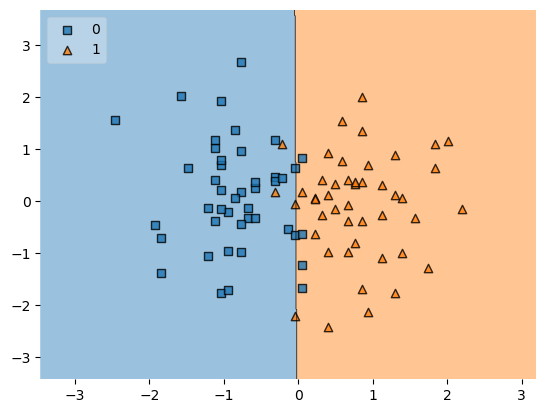

In [34]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf,open('model.pkl','wb'))